In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data_we = pd.read_csv('Employee.csv')
data_we.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [2]:
data_we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [3]:
from sklearn.preprocessing import LabelEncoder
data_we_int = data_we.copy()
encoder = LabelEncoder()

categorical_data = ['Education', 'JoiningYear','PaymentTier', 'City','Gender',
                    'EverBenched', 'Age', 'ExperienceInCurrentDomain']

for kolom in categorical_data:
  data_we_int[kolom] = encoder.fit_transform(data_we[kolom])

data_we_int.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,12,1,0,0,0
1,0,1,2,0,6,0,0,3,1
2,0,2,1,2,16,0,0,2,0
3,1,4,0,2,5,1,0,5,1
4,1,5,2,2,2,1,1,2,1


In [4]:
import joblib

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [5]:
for kolom in categorical_data:
  print(kolom,data_we_int[kolom].unique())

Education [0 1 2]
JoiningYear [5 1 2 4 3 0 6]
PaymentTier [2 0 1]
City [0 2 1]
Gender [1 0]
EverBenched [0 1]
Age [12  6 16  5  2  0  1 15 10 17  7  8 14  9  3  4 18 13 11 19]
ExperienceInCurrentDomain [0 3 2 5 1 4 7 6]


In [6]:
for kolom in categorical_data:
  print(kolom, data_we[kolom].unique())

Education ['Bachelors' 'Masters' 'PHD']
JoiningYear [2017 2013 2014 2016 2015 2012 2018]
PaymentTier [3 1 2]
City ['Bangalore' 'Pune' 'New Delhi']
Gender ['Male' 'Female']
EverBenched ['No' 'Yes']
Age [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
ExperienceInCurrentDomain [0 3 2 5 1 4 7 6]


In [7]:
data_we_int.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.142670,0.149903,-0.140741,-0.010611,-0.010889,-0.052249,-0.004463,0.080497
JoiningYear,0.142670,1.000000,0.051441,-0.096078,0.013165,-0.012213,0.049353,-0.036525,0.181705
City,0.149903,0.051441,1.000000,-0.295884,-0.030706,-0.168546,-0.007046,-0.009925,0.201058
PaymentTier,-0.140741,-0.096078,-0.295884,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638
Age,-0.010611,0.013165,-0.030706,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126
Gender,-0.010889,-0.012213,-0.168546,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701
EverBenched,-0.052249,0.049353,-0.007046,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438
ExperienceInCurrentDomain,-0.004463,-0.036525,-0.009925,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504
LeaveOrNot,0.080497,0.181705,0.201058,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000


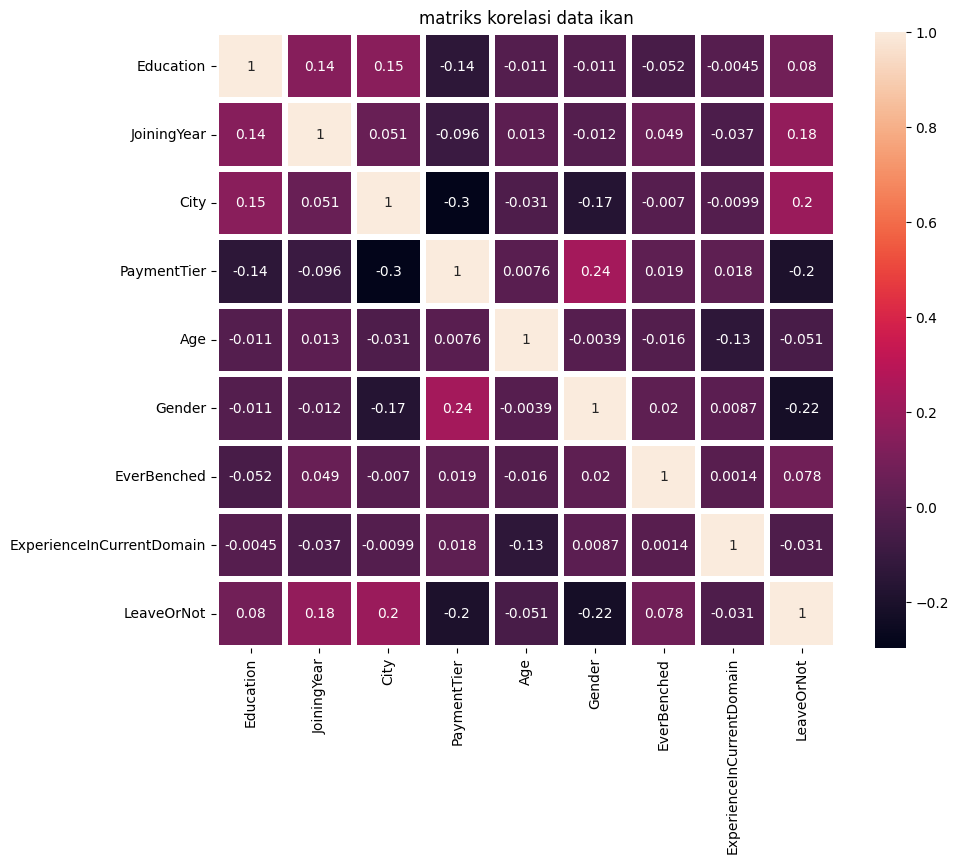

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('matriks korelasi data ikan')
sns.heatmap(data_we_int.corr(), annot=True, linewidths=3)
plt.show()

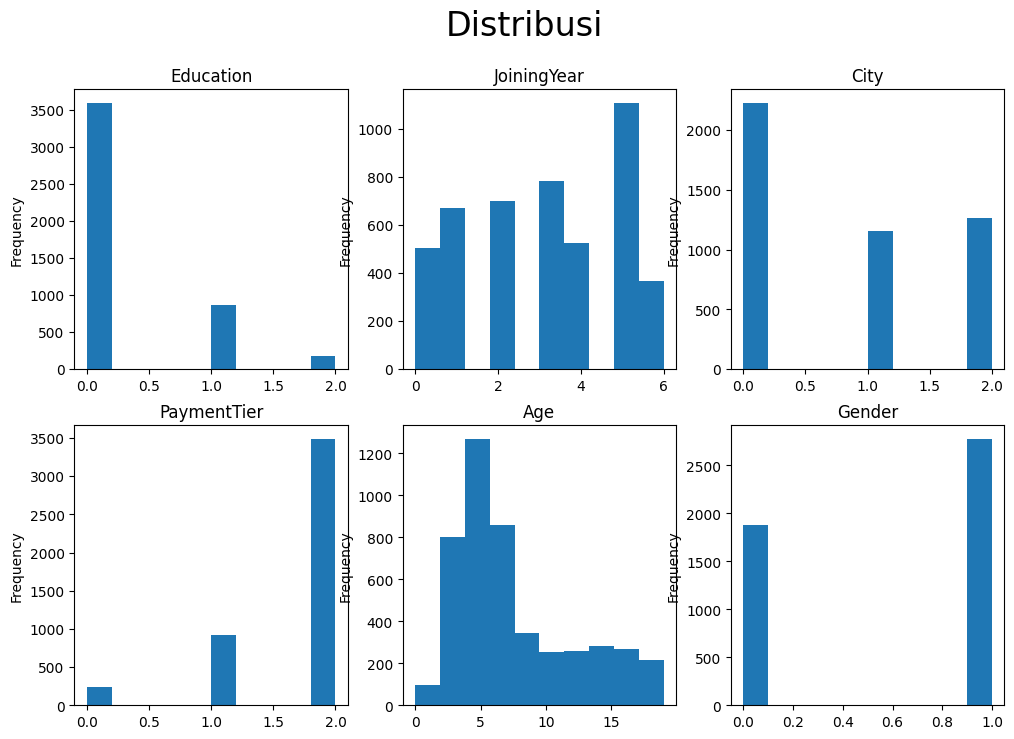

In [9]:
def distribusi():
  fig,axes= plt.subplots(nrows=2, ncols=3, figsize=(12,8))
  plt.suptitle('Distribusi', fontsize=24)

  def kolom_generator():
    for kolom in data_we_int:
      yield kolom
  kolom = kolom_generator()

  for i in range(0, 2):
    for j in range(0, 3):
      k = next(kolom)
      data_we_int[k].plot(kind='hist', ax = axes[i, j])
      axes[i, j].set_title(k)

plt.show()
distribusi()

In [10]:
data_we = data_we_int.drop('Age',axis=1)
label = data_we_int['Education']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_we, label, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3722, 8)
(931, 8)
(3722,)
(931,)


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [12]:
prediction = model.predict(x_test)

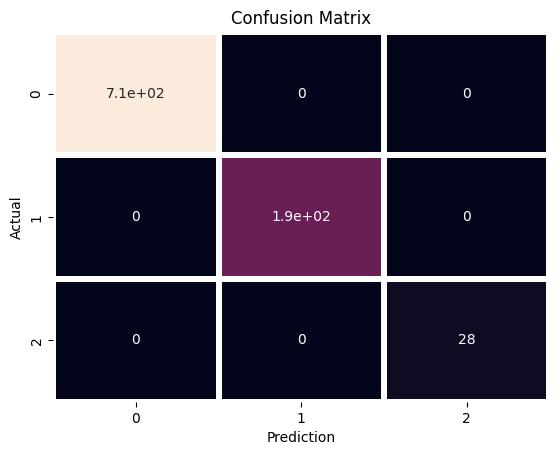

In [13]:
from sklearn.metrics import confusion_matrix
def display_conf(y_test,prediction):
    sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3,cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

display_conf(y_test,prediction)

In [14]:
from sklearn.metrics import r2_score, classification_report
print(f'r2_score :{r2_score(y_test, prediction)}')
print('Classification_report:')
print(classification_report(y_test, prediction,zero_division=0))

r2_score :1.0
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00        28

    accuracy                           1.00       931
   macro avg       1.00      1.00      1.00       931
weighted avg       1.00      1.00      1.00       931



In [15]:
# Meningkatkan Model
# Menggunakan GridSearchCV untuk menemukan model dengan parameter terbaik

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVC Model Hyperparameter
param_grid = {'C':[0.01,0.1,1,10,100],
              'gamma':[100,10,1,0,1,0.01]}

# Membuat model terbaik dari semua kemungkinan kombinasi param_grid
best_model = GridSearchCV(SVC(),param_grid,cv=5,refit=True)

# Melatih model terbaik
best_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0, 1, 0.01]})

In [16]:
best_model.best_estimator_

SVC(C=1, gamma=0.01)

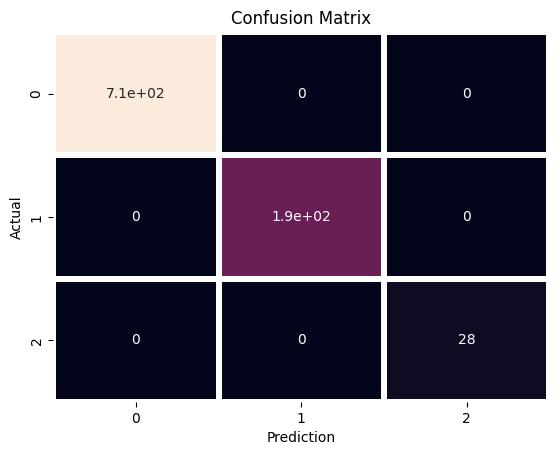

In [17]:
prediction = best_model.predict(x_test)
display_conf(y_test, prediction)

In [18]:
from sklearn.metrics import r2_score, classification_report
print(f'r2_score :{r2_score(y_test, prediction)}')
print('Classification_report:')
print(classification_report(y_test, prediction))

r2_score :1.0
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00        28

    accuracy                           1.00       931
   macro avg       1.00      1.00      1.00       931
weighted avg       1.00      1.00      1.00       931



In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Data sudah diencode sebelumnya
encoder = LabelEncoder()

def get_user_input():
    # Input dari pengguna
    Education = input("Masukkan Education (Bachelors (0) /Masters (1)): ")
    JoiningYear = int(input('JoiningYear: '))
    City = int(input('City (0: Bangalore, 1: New Delhi, 2: Pune): '))
    PaymentTier = int(input('PaymentTier (0: Tier 1, 1: Tier 2, 2: Tier 3): '))
    Age = int(input('Age: '))
    Gender = int(input('Gender (0: Female, 1: Male): '))
    EverBenched = int(input('EverBenched (0: No, 1: Yes): '))
    ExperienceInCurrentDomain = int(input('ExperienceInCurrentDomain: '))

    # Proses encoding untuk Education
    encoded_education = encoder.fit_transform([Education])[0]

    # Menyiapkan data baru untuk prediksi
    new_data = np.array([[encoded_education, JoiningYear, City, PaymentTier, Age, Gender, EverBenched, ExperienceInCurrentDomain]])

    return new_data

# Fungsi prediksi
def self_prediction():
    try:
        new_data = get_user_input()

        # Prediksi dari best model
        pred_label = best_model.predict(new_data)[0]
        pred_leaveornot = encoder.inverse_transform([pred_label])[0]

        # Menambahkan kondisi prediksi
        if pred_label == 0:
            pred_leaveornot = 'Leaving'
        else:
            pred_leaveornot = 'Not Leaving'

        print(f'Predicted Leaving or Not: {pred_leaveornot}')

    except Exception as e:
        print(f'Error: {e}')

self_prediction()

Masukkan Education (Bachelors/Masters): 1
JoiningYear: 1
City (0: Bangalore, 1: New Delhi, 2: Pune): 1
PaymentTier (0: Tier 1, 1: Tier 2, 2: Tier 3): 1
Age: 1
Gender (0: Female, 1: Male): 1
EverBenched (0: No, 1: Yes): 1
ExperienceInCurrentDomain: 1
Predicted Leaving or Not: Leaving


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [19]:
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(model, 'model.pkl')

['model.pkl']